In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Import 
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
Measurement_columns = inspector.get_columns('measurement')
for c in Measurement_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
Station_columns = inspector.get_columns('station')
for c1 in Station_columns:
    print(c1['name'], c1['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by((Measurement.date).desc()).first()

('2017-08-23')

In [18]:
for r in results:
    print (r)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2016-12-15', 0.14)
('2016-12-16', 0.03)
('2016-12-17', 0.07)
('2016-12-18', 0.16)
('2016-12-19', 0.03)
('2016-12-20', 0.0)
('2016-12-21', 0.11)
('2016-12-22', 0.86)
('2016-12-23', 0.24)
('2016-12-24', 0.2)
('2016-12-25', 0.02)
('2016-12-26', 0.22)
('2016-12-27', 0.05)
('2016-12-28', 0.09)
('2016-12-29', 0.52)
('2016-12-30', 0.29)
('2016-12-31', 0.25)
('2017-01-01', 0.03)
('2017-01-02', 0.01)
('2017-01-03', 0.0)
('2017-01-04', 0.0)
('2017-01-05', 0.06)
('2017-01-06', 0.1)
('2017-01-07', 0.0)
('2017-01-08', 0.0)
('2017-01-09', 0.0)
('2017-01-10', 0.0)
('2017-01-11', 0.0)
('2017-01-12', 0.0)
('2017-01-13', 0.0)
('2017-01-14', 0.01)
('2017-01-15', 0.0)
('2017-01-16', 0.0)
('2017-01-17', 0.0)
('2017-01-18', 0.0)
('2017-01-19', 0.02)
('2017-01-20', 0.0)
('2017-01-21', 0.03)
('2017-01-22', 0.09)
('2017-01-23', 0.01)
('2017-01-24', 0.13)
('2017-01-25', 0.79)
('2017-01-26', 0.0)
('2017-01-27', 0.03)
('2017-01-28', 0.0)
('2017-01-29', 0.26)
('2017-01-30', 0.0)
('2017-01-31', 0.0)
('2017-02-01'

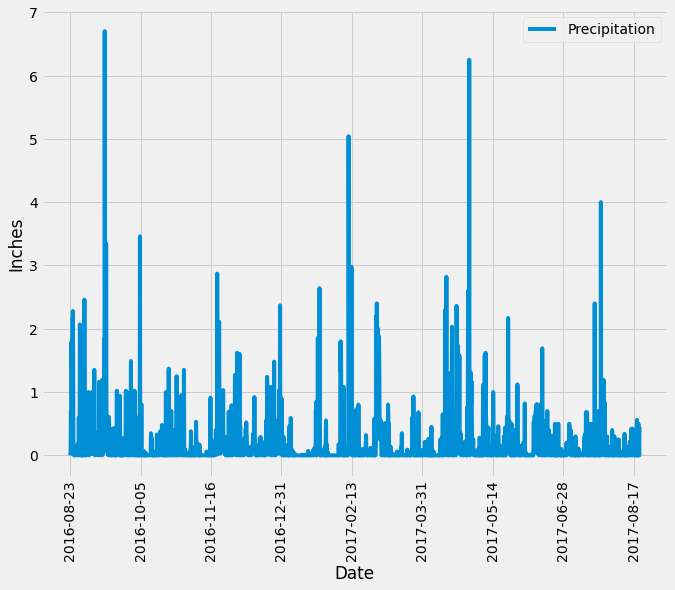

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
latest_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
one_year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_date)

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(results, columns=['date', 'Precipitation']).dropna()
prcp_df.set_index('date', inplace=True)

# Sort the dataframe by date
prcp_df_sorted = prcp_df.sort_values('date')
prcp_df_sorted.plot(figsize=(10, 8), label='precipitaion')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
# prcp_df_sorted.iloc[::1].plot.bar(title="Emoji Score",figsize=(10,5), legend='Precipitation')
# plt.xlabel('Date')
plt.show();
# prcp_df_group = prcp_df_sorted.groupby('Date')
# prcp_df_group = prcp_df_group['Precipitation'].max().reset_index()
# prcp_df_group.set_index('Date', inplace=True)
# prcp_df_group
# prcp_df_sorted.plot()
# Use Pandas Plotting with Matplotlib to plot the data
# fig = plt.subplots(figsize=(10,5))

# x_axis = np.arange(0, len(prcp_df_sorted))

# plt.bar(x_axis, prcp_df_sorted['Precipitation'])
# plt.xticks(prcp_df_sorted['date'], rotation = 'vertical')

# chart = prcp_df_sorted.plot(x_axis, y = "Precipitation")


In [124]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df_sorted.describe()

,Precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc())
for active_station in active_stations:
    print(active_station)

# Finding the most active station id
most_active_station = session.query(Measurement.station).\
                            group_by(Measurement.station).\
                            order_by(func.count(Measurement.station).desc()).first()
for most_active_station_id in most_active_station:
        print(f'The most active station id is {most_active_station_id}')

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)
The most active station id is USC00519281


In [30]:
tobs_results = session.query(Measurement.date, Measurement.tobs).\
                filter(Measurement.date >= one_year_date).\
                filter(Measurement.station == most_active_station[0]).all()

tobs_results

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [54]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs),
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]
active_station_stats = session.query(*sel).filter(Measurement.station == most_active_station_id).all()

print(f'Lowest temperature of the most active station {most_active_station_id} is {round(active_station_stats[0][0],2)}')
print(f'Highest temperature of the most active station {most_active_station_id} is {round(active_station_stats[0][1],2)}')
print(f'Average temperature of the most active station {most_active_station_id} is {round(active_station_stats[0][2],2)}')

Lowest temperature of the most active station USC00519281 is 54.0
Highest temperature of the most active station USC00519281 is 85.0
Average temperature of the most active station USC00519281 is 71.66


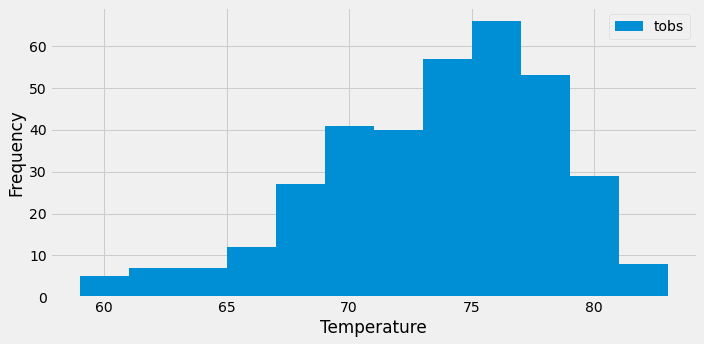

In [94]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs_results = session.query(Measurement.tobs).\
                filter(Measurement.date >= one_year_date).\
                filter(Measurement.station == most_active_station_id).all()

temperature = [tobs[0] for tobs in tobs_results]

tobs_bins = [59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83]

fig, ax = plt.subplots(figsize=(10,5))
ax.hist(temperature, bins=tobs_bins, label='tobs')
ax.legend()
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")
fig.tight_layout()
plt.show();

# Close session

In [ ]:
# Close Session
session.close()